In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Clean Google play store dataset.csv')

# Feature Information
1. App :- Name of the App
2. Category :- Category under which the App falls.
3. Rating :- Application's rating on playstore
4. Reviews :- Number of reviews of the App.
5. Size :- Size of the App.
6. Install :- Number of Installs of the App
7. Type :- If the App is free/paid
8. Price :- Price of the app (0 if it is Free)
9. Content Rating :- Appropiate Target Audience of the App.
10. Genres:- Genre under which the App falls.
11. Last Updated :- Date when the App was last updated
12. Current Ver :- Current Version of the Application
13. Android Ver :- Minimum Android Version required to run the App

In [4]:
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87000,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,1,8,2018
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,8,6,2018
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28000,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,20,6,2018


### Checking if the data is 100% clean and ready for EDA and Feature Engineering

In [5]:
df.drop('Unnamed: 0'  , axis=1 , inplace=True)

In [6]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87000,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28000,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,20,6,2018


In [8]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            9659 non-null   int64  
 5   Installs        9659 non-null   int64  
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Current Ver     9659 non-null   object 
 11  Android Ver     9659 non-null   object 
 12  Day             9659 non-null   int64  
 13  Month           9659 non-null   int64  
 14  Year            9659 non-null   int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 4.9 MB


In [9]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Current Ver       0
Android Ver       0
Day               0
Month             0
Year              0
dtype: int64

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9659.0,4.192442e+00,4.963971e-01,1.0,4.0,4.3,4.5,5.000000e+00
Reviews,9659.0,2.165926e+05,1.831320e+06,0.0,25.0,967.0,29401.0,7.815831e+07
Size,9659.0,3.790727e+04,2.340701e+04,11.0,21000.0,33000.0,50000.0,1.000000e+05
Installs,9659.0,7.777507e+06,5.375828e+07,0.0,1000.0,100000.0,1000000.0,1.000000e+09
Price,9659.0,1.099299e+00,1.685215e+01,0.0,0.0,0.0,0.0,4.000000e+02
Day,9659.0,1.563298e+01,9.431017e+00,1.0,7.0,16.0,24.0,3.100000e+01
Month,9659.0,6.364013e+00,2.659610e+00,1.0,5.0,7.0,8.0,1.200000e+01
Year,9659.0,2.017346e+03,1.137600e+00,2010.0,2017.0,2018.0,2018.0,2.018000e+03


In [14]:
df.duplicated().sum()

0

In [17]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018


In [18]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size                int64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Current Ver        object
Android Ver        object
Day                 int64
Month               int64
Year                int64
dtype: object

### Conclusion : Data is clean and ready for analysis and Feature Engineering

In [25]:
numeric_cols=[col for col in df.columns if df[col].dtype!='O']

In [28]:
print(numeric_cols)
print(len(numeric_cols))

['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Day', 'Month', 'Year']
8


In [29]:
categorical_col=[col for col in df.columns if df[col].dtype=='object']
print(categorical_col)
print(len(categorical_col))

['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']
7


### Understanding the categorical features

In [31]:
for features in categorical_col:
    print(f"Feature : {features}")
    print(f"Unique values : {df[features].unique()}")
    print(f"No. of unique values : {df[features].nunique()}")
    print()

Feature : App
Unique values : ['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']
No. of unique values : 9659

Feature : Category
Unique values : ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']
No. of unique values : 33

Feature : Type
Unique values : ['Free' 'Paid']
No. of unique values : 2

Feature : Content Rating
Unique values : ['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 1

In [37]:
for features in categorical_col:
    print(features)
    print(df[features].value_counts(normalize=True)*100)
    print('----------------------------------------------------------------------------------------------------')

App
Photo Editor & Candy Camera & Grid & ScrapBook    0.010353
Tic Tac CK                                        0.010353
INFAMY RO                                         0.010353
CK Call NEW                                       0.010353
Ck Coif                                           0.010353
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.010353
Dance School Stories - Dance Dreams Come True     0.010353
3D Bowling                                        0.010353
Mind Games Pro                                    0.010353
iHoroscope - 2018 Daily Horoscope & Astrology     0.010353
Name: App, Length: 9659, dtype: float64
----------------------------------------------------------------------------------------------------
Category
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743

### Univariate analysis of numerical features

In [43]:
numeric_cols

['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Day', 'Month', 'Year']

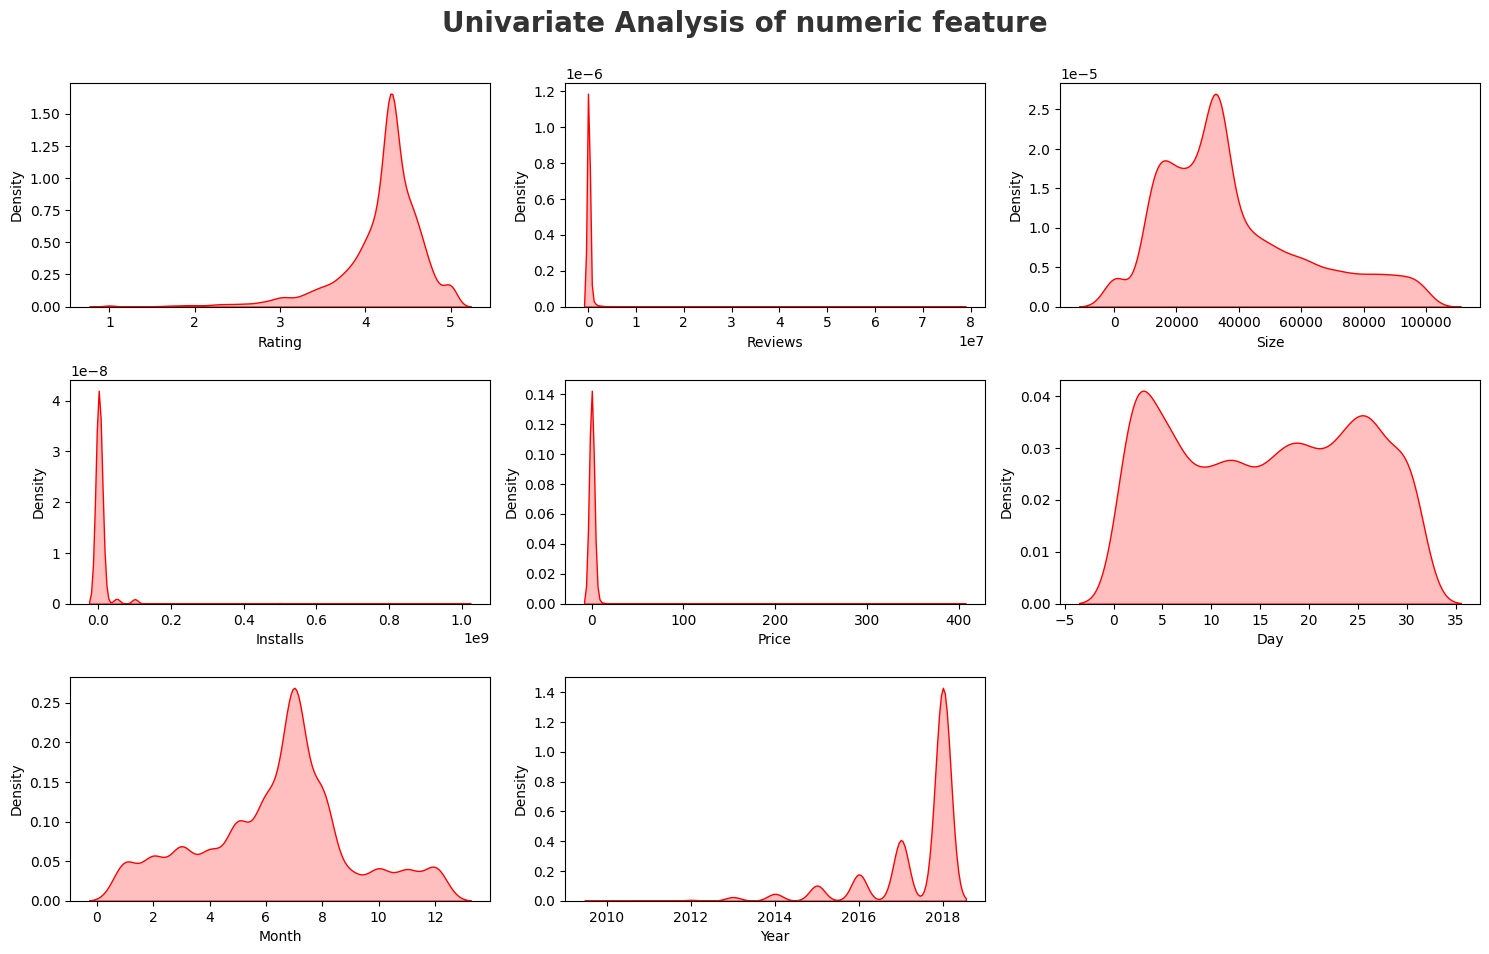

In [46]:
plt.figure(figsize=(15 , 15))
plt.suptitle("Univariate Analysis of numeric feature" , fontsize=20  , fontweight='bold' , alpha=0.8 , y=1)

for i in range(0 , len(numeric_cols)):
    plt.subplot(5 , 3 ,i+1)
    sns.kdeplot(x=df[numeric_cols[i]] , fill=True, color='r')
    plt.xlabel(numeric_cols[i])
    plt.tight_layout()

### Observation : 

1. Rating and year are left skewed 
2. Reviews , Price and Installs are right skewed 
3. Graph for year is multimodal graph with 5 peaks

### Analyzing the categorical columns : Type and Rating

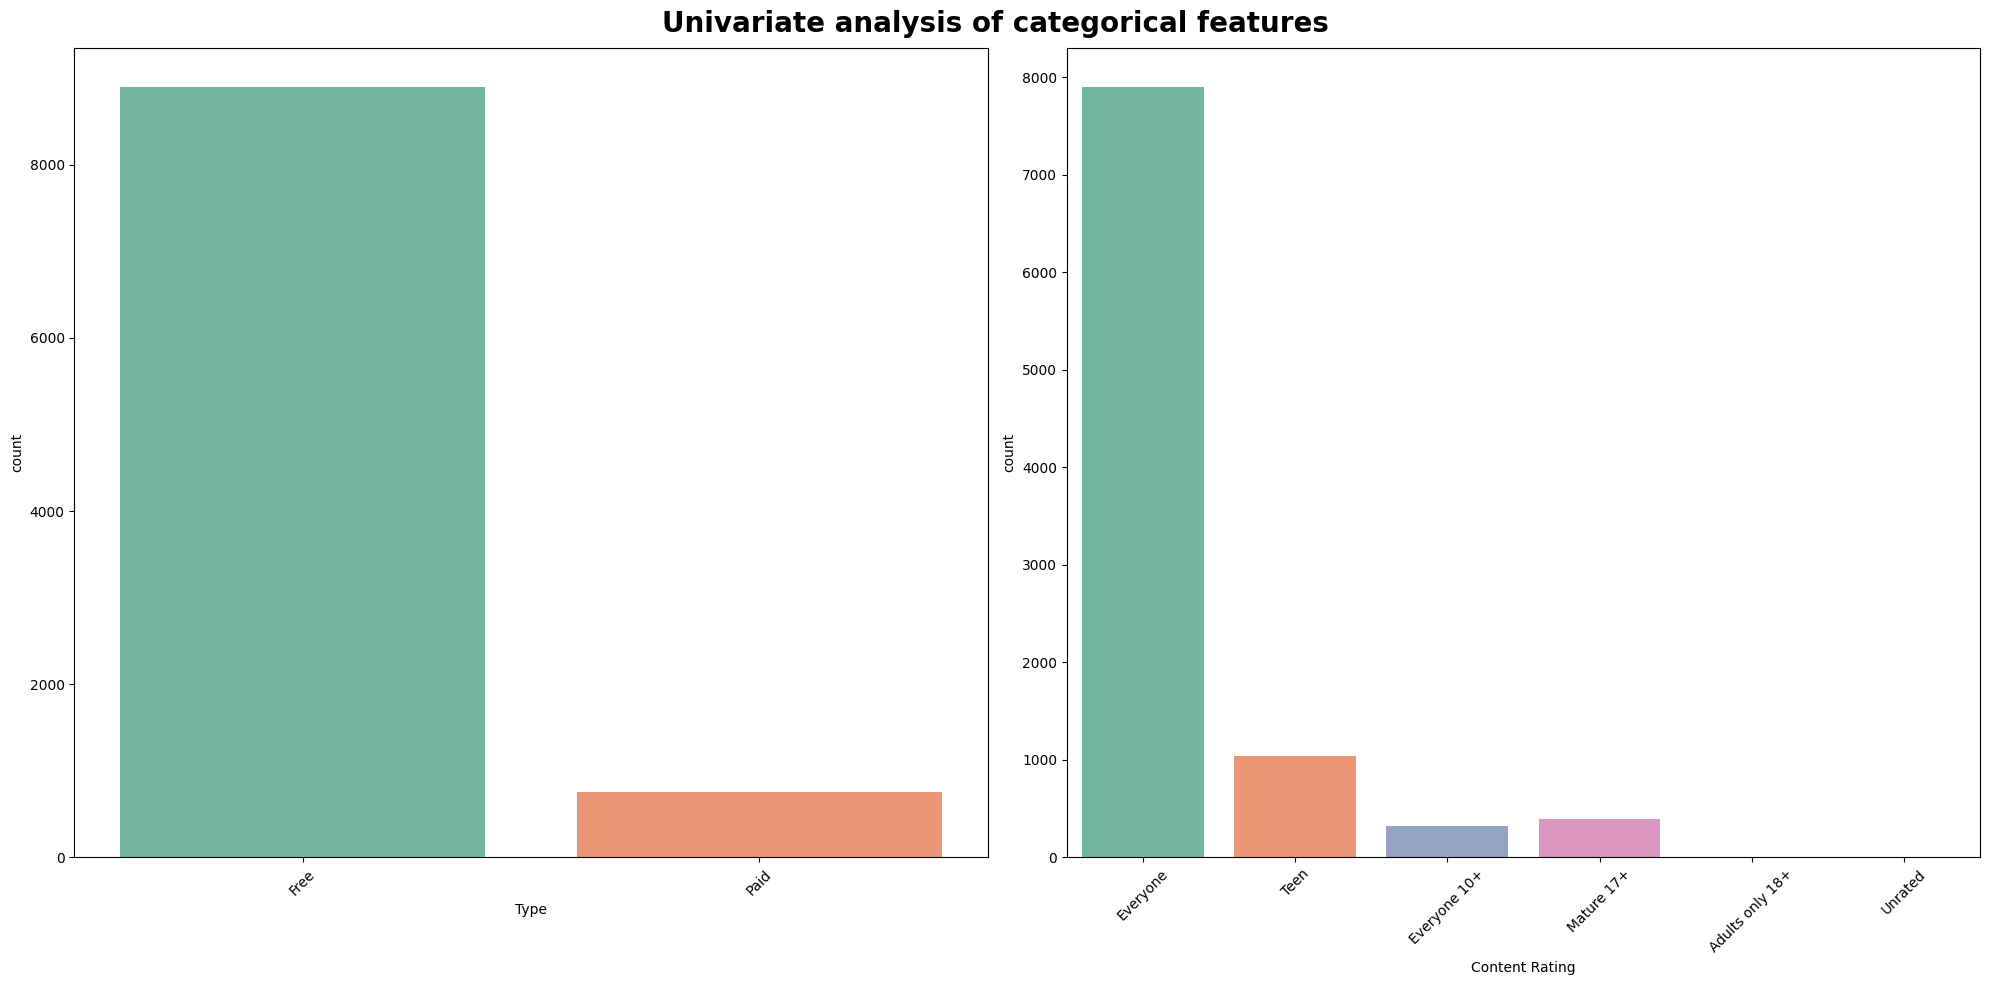

In [51]:
plt.figure(figsize=(20 , 10))
plt.suptitle("Univariate analysis of categorical features" , fontsize=20 , fontweight='bold')

category=['Type' , 'Content Rating']
for i in range(0 , len(category)):
    plt.subplot(1 , 2 , i+1)
    sns.countplot(x=df[category[i]] , palette='Set2')
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

In [52]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

### Observation : 

- Type : There are 2 categories in Type : Free and Paid . It can clearly observed that most of the apps (92%) are available for free on Google play Store
- Content Rating : Most of the apps on Play store are available for everyon (All age group) , Then comes the apps dedicated for teen  and Everyone 10+ . Few apps are have mature rating  and very less apps are adult apps

### Which is the most popular app category?

In [56]:
df['Category'].value_counts()

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

<Axes: ylabel='Category'>

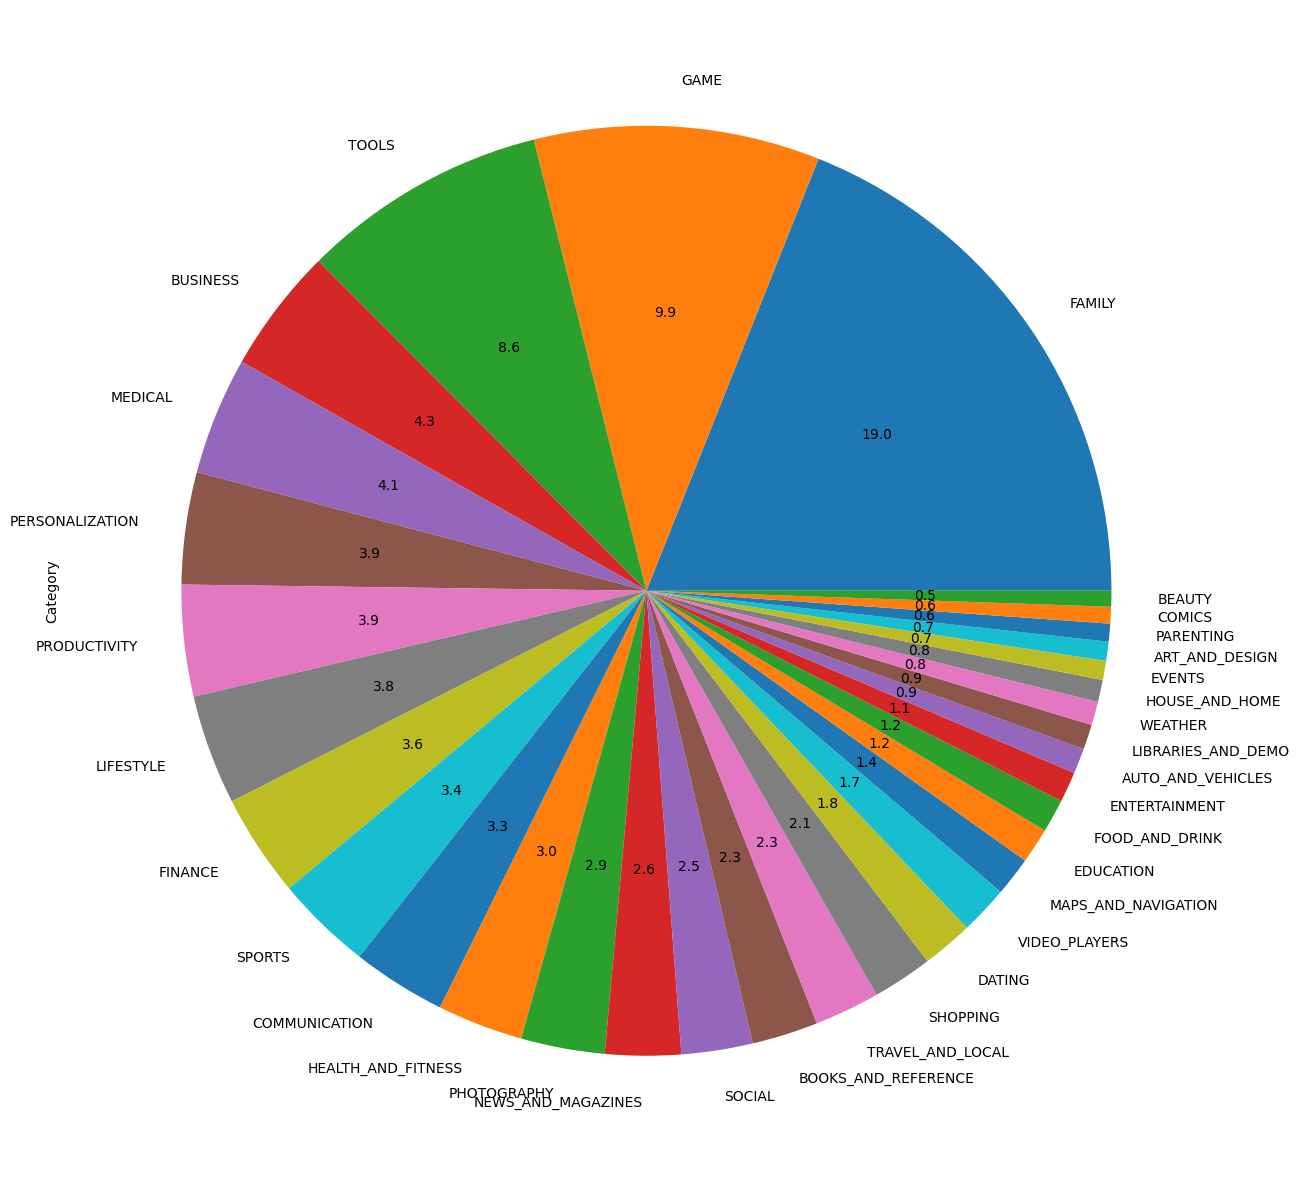

In [62]:
df['Category'].value_counts().plot.pie(y=df['Category'] , figsize=(15 , 16) , autopct='%1.1f')

#### Top 10 App Categories

In [67]:
category_count=pd.DataFrame(df['Category'].value_counts().head(10)).reset_index()
category_count.columns = ['Category' , 'Count']

In [71]:
category_count

,Category,Count
0,FAMILY,1832
1,GAME,959
2,TOOLS,827
3,BUSINESS,420
4,MEDICAL,395
5,PERSONALIZATION,376
6,PRODUCTIVITY,374
7,LIFESTYLE,369
8,FINANCE,345
9,SPORTS,325


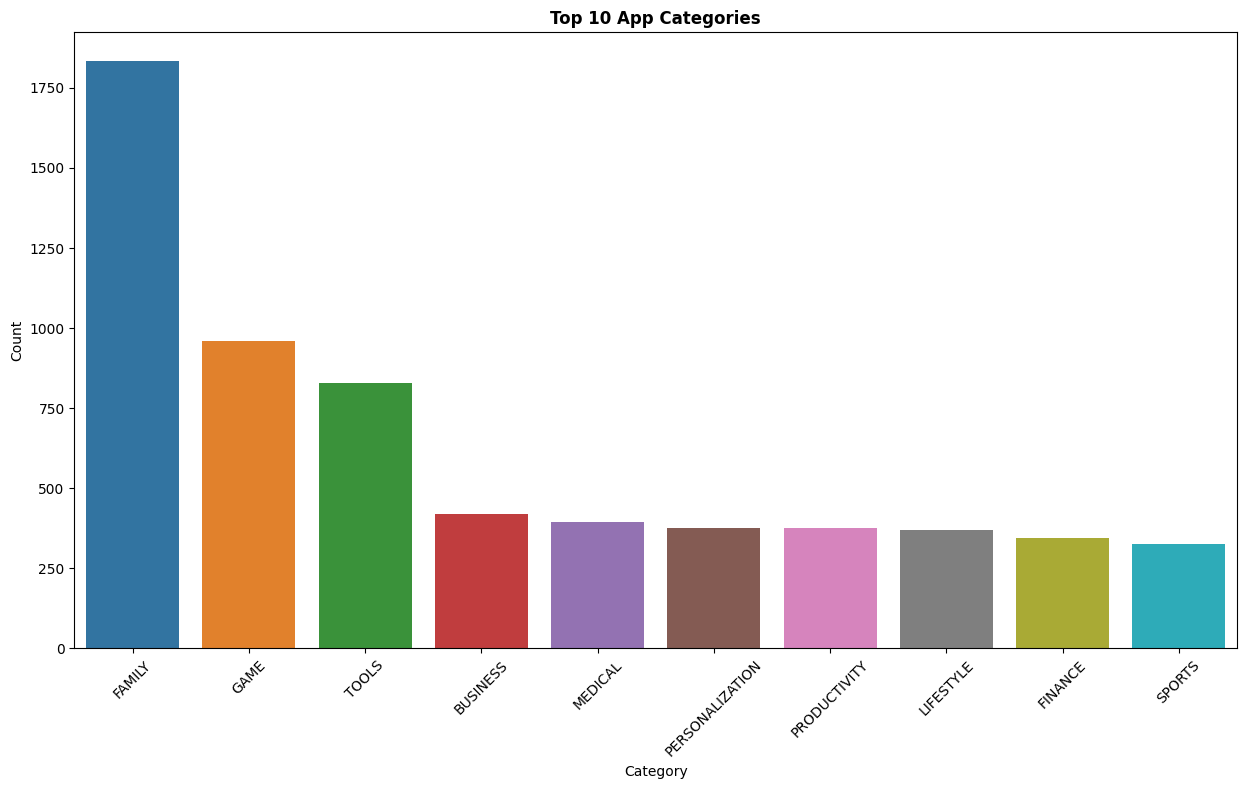

In [83]:
plt.figure(figsize=(15 , 8))
plt.title("Top 10 App Categories" , fontweight='bold')
sns.barplot(x=category_count['Category'] ,y=category_count['Count'])
plt.xticks(rotation=45)
plt.show()

### Observation

- Most the apps on the play store have category as Family ,followed by Games, tools , bussiness and more
- Categories like : beauty , Comics , parenting are the categories with least number of apps

## Internal Assignments

## 1. Which Category has largest number of installations??

In [86]:
df[['Category' , 'Installs']]

,Category,Installs
0,ART_AND_DESIGN,10000
1,ART_AND_DESIGN,500000
2,ART_AND_DESIGN,5000000
3,ART_AND_DESIGN,50000000
4,ART_AND_DESIGN,100000
...,...,...
9654,FAMILY,5000
9655,FAMILY,100
9656,MEDICAL,1000
9657,BOOKS_AND_REFERENCE,1000


In [90]:
categorywise_installation=pd.DataFrame(df.groupby(by='Category')['Installs'].sum()).reset_index()
categorywise_installation.columns=['Category' ,'Total Installation']

In [93]:
categorywise_installation=categorywise_installation.sort_values(by='Total Installation' , ascending=False).reset_index(drop=True)

In [94]:
categorywise_installation

,Category,Total Installation
0,GAME,13878924415
1,COMMUNICATION,11038276251
2,TOOLS,8001771915
3,PRODUCTIVITY,5793091369
4,SOCIAL,5487867902
5,PHOTOGRAPHY,4649147655
6,FAMILY,4427941505
7,VIDEO_PLAYERS,3926902720
8,TRAVEL_AND_LOCAL,2894887146
9,NEWS_AND_MAGAZINES,2369217760


#### Based on the above dataframe it can be observed that *Game* category has highest number of installation followed by *Communication* and *Tool* category

### 2. What are the Top 5 most installed Apps in Each popular Categories ??

In [95]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver',
       'Day', 'Month', 'Year'],
      dtype='object')

In [109]:
dfa=pd.DataFrame(df.groupby(by=['Category' , 'App'])['Installs'].sum()).reset_index()
dfa=dfa.sort_values('Installs' , ascending = False).reset_index(drop=True)
app_cat_df

,Category,App,Installs
0,TRAVEL_AND_LOCAL,Google Street View,1000000000
1,NEWS_AND_MAGAZINES,Google News,1000000000
2,COMMUNICATION,Skype - free IM & video calls,1000000000
3,VIDEO_PLAYERS,YouTube,1000000000
4,COMMUNICATION,WhatsApp Messenger,1000000000
...,...,...,...
9654,TRAVEL_AND_LOCAL,EG | Explore Folegandros,0
9655,MEDICAL,EP Cook Book,0
9656,FINANCE,Eu sou Rico,0
9657,FAMILY,Ain Arabic Kids Alif Ba ta,0


In [110]:
apps=['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL' ]

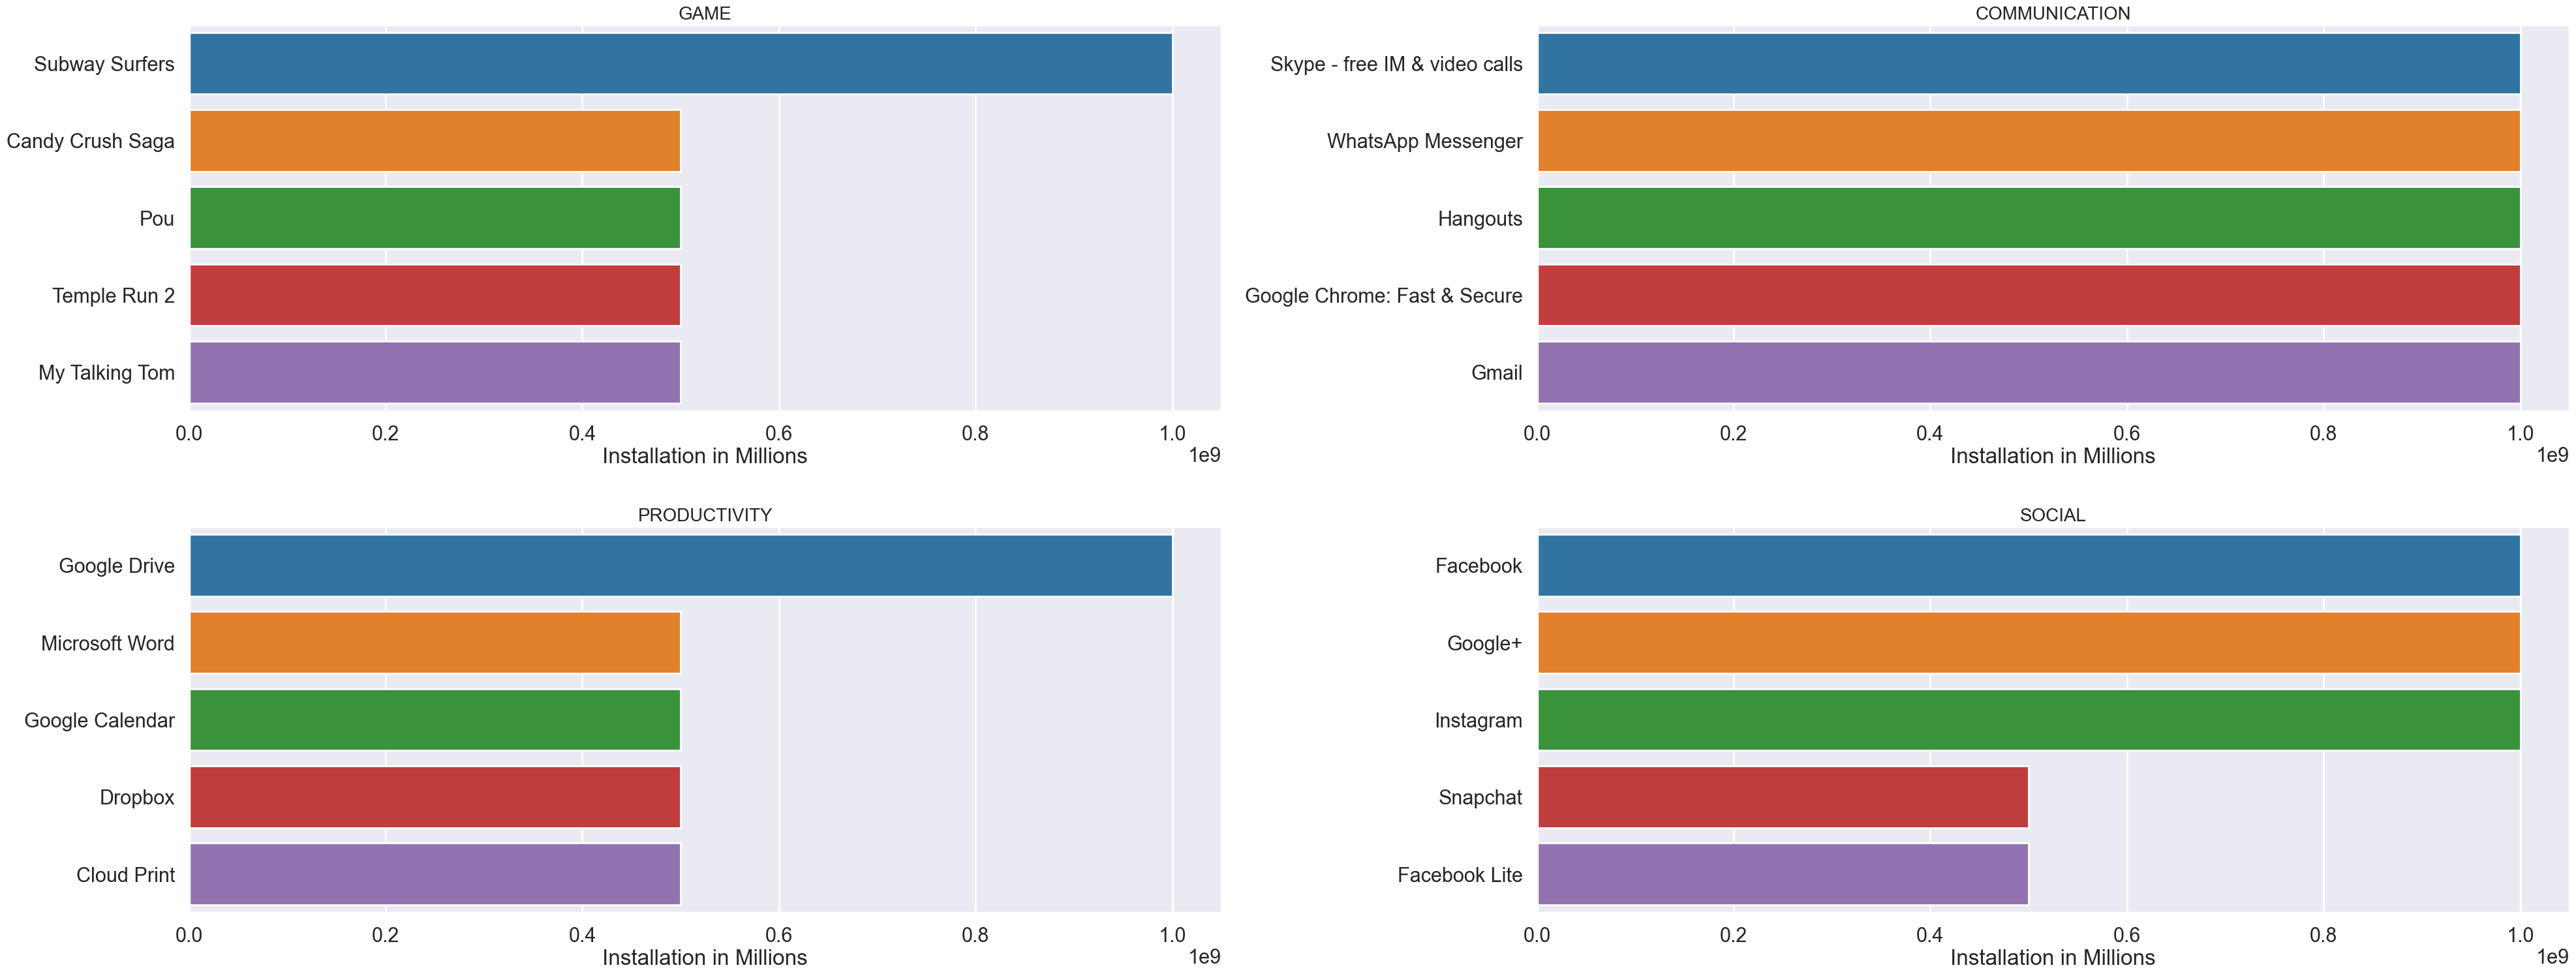

In [119]:
sns.set_context("poster")
sns.set_style("darkgrid")

plt.figure(figsize=(40,30))

for i,app in enumerate(apps):
    df2 = dfa[dfa.Category == app]
    df3 = df2.head(5)
    plt.subplot(4,2,i+1)
    sns.barplot(data= df3,x= 'Installs' ,y='App' )
    plt.xlabel('Installation in Millions')
    plt.ylabel('')
    plt.title(app,size = 20)

plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

In [116]:
apps=['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL' ]
for index ,app in enumerate(apps):
    print(index , app)

0 GAME
1 COMMUNICATION
2 PRODUCTIVITY
3 SOCIAL


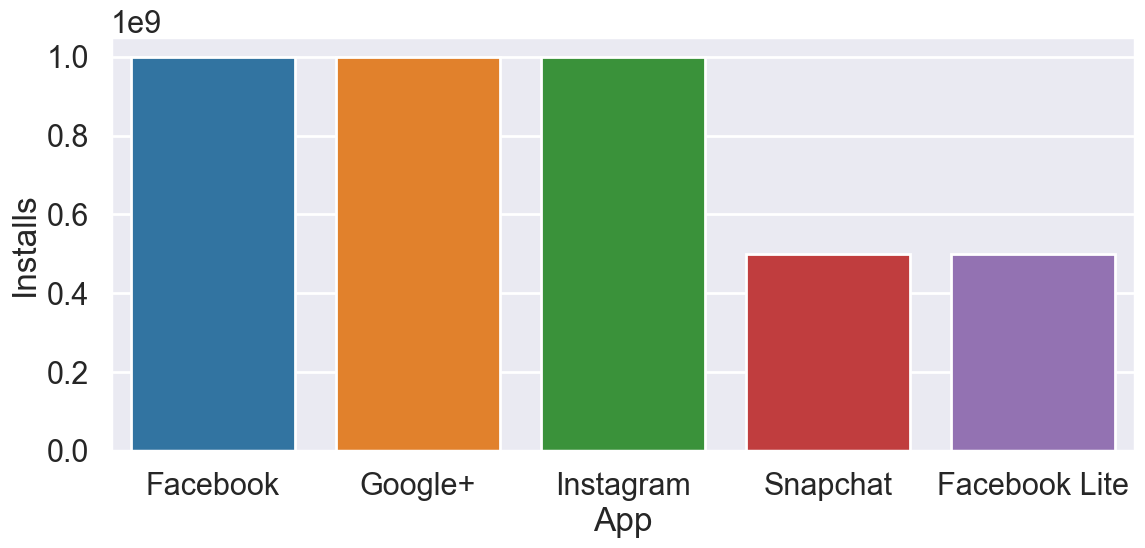

In [126]:
plt.figure(figsize=(12 , 6))
df2 = dfa[dfa.Category == app]
df3=df2.head(5)
df3
sns.barplot(data=df3 , x='App' , y='Installs')
plt.tight_layout()

### 3. How many apps are there on Google Play Store which get 5 ratings??

In [127]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver',
       'Day', 'Month', 'Year'],
      dtype='object')

In [131]:
df.query('Rating == 5')['App'].count()

271

#### Based on the data provided 271 apps have Rating as 5 on Google play Store